In [1]:
# Run pip in quiet mode to suppress output
!pip -q install geopandas
!pip -q install rtree

     |████████████████████████████████| 1.1 MB 5.3 MB/s 
     |████████████████████████████████| 7.8 MB 23.9 MB/s 
     |████████████████████████████████| 16.6 MB 132 kB/s 
     |████████████████████████████████| 1.0 MB 4.9 MB/s 


In [2]:
import geopandas
import os
import rtree
import matplotlib.pyplot as plt

from shapely.geometry import Polygon

In [3]:
# Check if file already exists
matches = [match for match in os.listdir() if "HW4.zip" in match]

# If file is missing, then download it and unzip
# Run in quiet mode to suppress output
if not matches:
  !wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y4jGeoKbQX6B1CzB9ASbe_cNVONID4uI' -O HW4.zip
  !unzip -q HW4.zip

In [4]:
# Retrieve all the lakes from the MidcoastLakes shape file(s) into main memory using geopandas and create a geodataframe
midcoastlakes = geopandas.read_file("HW4/MidCoastLakes.shp")

In [5]:
# Display head of geopanda file
midcoastlakes.head()

,OBJECTID,ComID,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FCode,Shape_Leng,Shape_Area,geometry
0,68,5202222,5202222,1999-07-04,3,00561373,Medomak Pond,0.972,0.0,01050003001187,390,39004,0.058341,0.000109,"POLYGON Z ((-69.37233 44.20297 0.00000, -69.37..."
1,71,5202236,5202236,1999-07-04,3,None,None,0.027,0.0,01050003001180,390,39004,0.007149,0.000003,"POLYGON Z ((-69.33155 44.19537 0.00000, -69.33..."
2,72,5202240,5202240,1999-07-04,3,00569904,Little Medomak Pond,0.306,0.0,01050003001186,390,39004,0.025725,0.000034,"POLYGON Z ((-69.33654 44.18778 0.00000, -69.33..."
3,75,5202252,5202252,1999-07-04,3,01773558,Tolman Pond,0.133,0.0,01050003001169,390,39004,0.020948,0.000015,"POLYGON Z ((-69.14682 44.17816 0.00000, -69.14..."
4,76,5202256,5202256,1999-07-04,3,00570612,Maces Pond,0.112,0.0,01050003001176,390,39004,0.014652,0.000013,"POLYGON Z ((-69.12086 44.16485 0.00000, -69.12..."


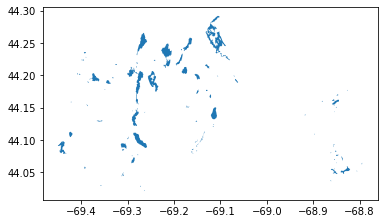

In [6]:
# Plot the geopanda file
midcoastlakes.plot()

In [7]:
# Convert all the rows in the geodataframe into a in-memory list of list elements
# Also transpose columns and rows
mdd = midcoastlakes.T
mdd

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
OBJECTID,68,71,72,75,76,79,80,81,82,120,...,1083,1084,1085,1495,1496,1574,1575,1593,1612,1631
ComID,5202222,5202236,5202240,5202252,5202256,5202270,5202276,5202278,5202282,5202138,...,2685046,2685068,2685080,2682672,5202340,5202126,5202206,2684730,5202170,2684812
Permanent_,5202222,5202236,5202240,5202252,5202256,5202270,5202276,5202278,5202282,5202138,...,2685046,2685068,2685080,2682672,5202340,5202126,5202206,2684730,5202170,2684812
FDate,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,...,1999-07-04,1999-07-04,1999-07-04,1999-07-04,1999-07-04,2008-07-21,2008-07-21,2008-07-21,2008-07-21,2009-11-02
Resolution,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
GNIS_ID,00561373,None,00569904,01773558,00570612,None,00563933,None,None,00568125,...,None,None,None,None,00565367,00575235,00578366,00572500,00569485,571129
GNIS_Name,Medomak Pond,None,Little Medomak Pond,Tolman Pond,Maces Pond,None,Chickawaukie Pond,None,None,Hobbs Pond,...,None,None,None,None,Duckpuddle Pond,Sennebec Pond,White Oak Pond,Norton Pond,Lermond Pond,Megunticook Lake
AreaSqKm,0.972,0.027,0.306,0.133,0.112,0.023,1.384,0.016,0.007,1.062,...,0.004,0.016,0.013,0.068,1.203,2.228,2.453,5.744,0.709,0.292
Elevation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ReachCode,01050003001187,01050003001180,01050003001186,01050003001169,01050003001176,01050003001208,01050003001179,01050003001199,01050003001201,01050003001132,...,01050002004122,01050002004129,01050002004133,01050002004111,01050003001249,01050003001148,01050003001171,01050002004074,01050003001153,01050002004081


In [8]:
# Convert all the rows in the geodataframe into a in-memory list of list elements
lakes_list = []

for i in range (0, midcoastlakes.shape[0]):
  lakes_list.append(midcoastlakes.iloc[i])

In [9]:
# Next, create an empty R-tree using the r-tree package
p = rtree.index.Property()
idx = rtree.index.Index(properties=p)
idx

rtree.index.Index(bounds=[1.7976931348623157e+308, 1.7976931348623157e+308, -1.7976931348623157e+308, -1.7976931348623157e+308], size=0)

In [10]:
# Write a loop to insert the object ID and MBB from the lakes_list in the R-tree
for i in mdd:
  coords = lakes_list[i]["geometry"].bounds
  idx.insert(i, coords)

In [11]:
# Print the bounding box of the R-tree
idx

rtree.index.Index(bounds=[-69.44997280263976, 44.02127473167013, -68.79423740365758, 44.29199779791662], size=103)

In [12]:
# Intersect a query rectangle with the R-tree
hits = idx.intersection((-69.2, 44.12, -69.025, 44.19), objects=True)
lakes = []
for i in hits:
  # Map the found objects to the full tuple (name and polygon) in the lake list and create a result list of all found objects with all lake dictionary data
  lakes.append(lakes_list[i.id])

In [13]:
# List all the found lakes that the R-tree returns
lakes

[OBJECTID                                                    926
 ComID                                                   5202272
 Permanent_                                              5202272
 FDate                                                1999-07-04
 Resolution                                                    3
 GNIS_ID                                                    None
 GNIS_Name                                                  None
 AreaSqKm                                                  0.059
 Elevation                                                   0.0
 ReachCode                                        01050003001184
 FType                                                       390
 FCode                                                     39004
 Shape_Leng                                             0.021231
 Shape_Area                                             0.000007
 geometry      POLYGON Z ((-69.17238366973731 44.153404331465...
 Name: 63, dtype: object,

In [14]:
# List all lakes found in query rectangle
for item in lakes:
  print(item["GNIS_Name"])

None
None
Tolman Pond
Rocky Pond
Maces Pond
Chickawaukie Pond
None
None
Lilly Pond
